In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import tensorflow

# Read the CSV and Perform Basic Data Cleaning

In [71]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [72]:
# Drop unnecesary columns for the model 
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [73]:
# drop the error columns 
df = df.drop(['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
              'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2',
              'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 
              'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 
              'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'], axis=1)

### Feature Definitions
#### <b>source:</b> <a href="https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html">NASA Exoplanet Archive</a>  
 
<strong>koi_fpflag_nt</strong>  
A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections  
<strong>koi_fpflag_ss</strong>  
A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.  
<strong>koi_fpflag_co</strong>  
The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture.  
<strong>koi_fpflag_ec</strong>    
The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.    
<strong>koi_period</strong>    
The interval between consecutive planetary transits.  
<strong>koi_period_err1</strong>  
Level of uncertainty for above  
<strong>koi_period_err2</strong>   
Level of uncertainty for above  
<strong>koi_time0bk</strong>  
The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC.  
<strong>koi_time0bk_err1</strong>  
Level of uncertainty for above  
<strong>koi_time0bk_err2</strong>  
Level of uncertainty for above  
<strong>koi_impact</strong>  
The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.  
<strong>koi_impact_err1</strong>  
Level of uncertainty for above  
<strong>koi_impact_err2</strong>  
Level of uncertainty for above  
<strong>koi_duration</strong>  
The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. Contact times are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.  
<strong>koi_duration_err1</strong>  
Level of uncertainty for above  
<strong>koi_duration_err2</strong>  
Level of uncertainty for above  
<strong>koi_depth</strong>  
The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.  
<strong>koi_depth_err1</strong>  
Level of uncertainty for above  
<strong>koi_depth_err2</strong>  
Level of uncertainty for above  
<strong>koi_prad</strong>  
The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius.  
<strong>koi_prad_err1</strong>  
Level of uncertainty for above  
<strong>koi_prad_err2</strong>  
Level of uncertainty for above  
<strong>koi_teq</strong>  
Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.  
<strong>koi_insol</strong>  
Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.  
<strong>koi_insol_err1</strong>  
Level of uncertainty for above  
<strong>koi_insol_err2</strong>  
Level of uncertainty for above  
<strong>koi_model_snr</strong>  
Transit depth normalized by the mean uncertainty in the flux during the transits.  
<strong>koi_tce_plnt_num</strong>  
TCE Planet Number federated to the KOI.  
<strong>koi_steff</strong>  
The photospheric temperature of the star.  
<strong>koi_steff_err1</strong>  
Level of uncertainty for above  
<strong>koi_steff_err2</strong>  
Level of uncertainty for above  
<strong>koi_slogg</strong>  
The base-10 logarithm of the acceleration due to gravity at the surface of the star.  
<strong>koi_slogg_err1</strong>  
Level of uncertainty for above  
<strong>koi_slogg_err2</strong>  
Level of uncertainty for above  
<strong>koi_srad</strong>  
The photospheric radius of the star  
<strong>koi_srad_err1</strong>  
Level of uncertainty for above  
<strong>koi_srad_err2</strong>  
Level of uncertainty for above  
<strong>ra</strong>  
KIC Right Ascension  
<strong>dec</strong>  
KIC Declination  
<strong>koi_kepmag</strong>    
Kepler-band (mag)  


# Feature Selection

In [74]:
# Set features

feature_names = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
                 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
                 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff','koi_slogg','koi_srad', 'ra', 'dec', 'koi_kepmag']

X = df[feature_names]

# Target Selection

In [75]:
target_names = df['koi_disposition'].unique()[0:3]
target_names

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder

y  = df["koi_disposition"]

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
encoded_y


array([1, 2, 2, ..., 0, 2, 2])

# Create a Train Test Split


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [78]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,133.077240,0.150,3.61600,123.1,1.24,1017,253.30,10.8,1,5737,4.327,1.125,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,132.020050,0.291,2.30900,114.6,0.86,1867,2891.64,13.8,1,5855,4.578,0.797,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,134.460380,0.970,79.89690,641.1,3.21,989,226.81,254.3,1,6328,4.481,0.963,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,174.662240,0.300,2.63120,875.4,2.25,696,55.37,38.4,1,4768,4.536,0.779,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,1,5712,4.359,1.082,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [79]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Model Training and Hyperparameter Tuning


In [92]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,31,33],
               'weights':['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan']}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5)

In [93]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 31, 33],
                         'weights': ['uniform', 'distance']})

In [94]:
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Training Score: {grid.best_score_}")
print(f"Testing Score: {grid.score(X_test_scaled, y_test)}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}
Best Training Score: 0.8104141348721793
Testing Score: 0.8146453089244852


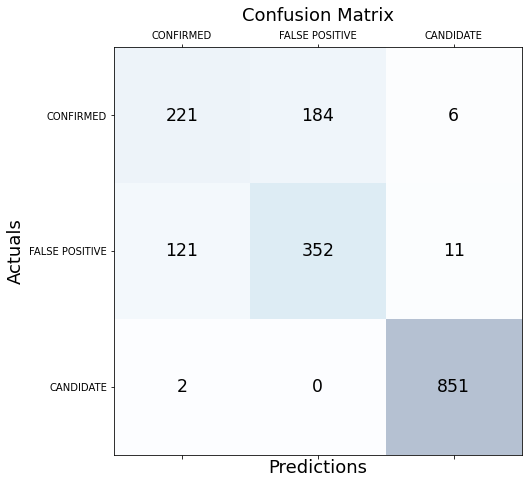

In [96]:
# Create a confusion matrix to visualise the performance 
predictions = grid.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1,2])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1,2])
ax.set_yticklabels(target_names)

plt.show()

# Save the Model

In [31]:
# Model not saved as inferior to other models tested